In [49]:
import pandas as pd
import numpy as np

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import datetime as dt

In [4]:
df=pd.read_excel(r"C:\Users\SANATH\Downloads\IRIS_EDA\online+retail\Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
# counting the null values 
# round(100*(df.isnull().sum())/len(df),2)    # it help to find persentage the null values in every column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# removing all the null values from the dataframe
df=df.dropna()
df.shape

(406829, 8)

In [7]:
# The are no null values in the dataframe
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# RFM:
* R(Recency): Number of days since last purchase
* F(Frequency): Number of tracsactions
* M(Monetary): Total amount of transaction (revenue contributed)

In [9]:
# Adding new column 'amount'
# In this we have the 'quantity' of the product and 'unitprice' of each product.
# so we multiplying this two columns ('quantity' and 'unitprice') to form a new column 'amount'

df['amount']=df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
# monetary
# grouping by customerID and amount 
# it group the unique customerID and sum the amount
amount=df.groupby('CustomerID')['amount'].sum()
amount=amount.reset_index()
amount.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [11]:
# frequency
# we should use nunique[it counts the unique values]       
# If we use unique it gives the unique values not the count
frequency=df.groupby('CustomerID')['InvoiceNo'].nunique()
frequency=frequency.reset_index()
frequency.columns=['CustomerID','frequency']
frequency.head()

,CustomerID,frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [12]:
# merging two columns [monetory as 'amount' and frequency]
group_df=pd.merge(amount,frequency,on='CustomerID',how='inner')
group_df.head()

,CustomerID,amount,frequency
0,12346.0,0.00,2
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1


In [13]:
# finding max_date 
max_date=max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [14]:
# finding the difference between max_date and InvoiceDate
df['diff']=max_date-df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [15]:
# receancy
last_purchase=df.groupby('CustomerID')['diff'].min()
last_purchase=last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [16]:
group_df=pd.merge(group_df,last_purchase,on='CustomerID',how='inner')
group_df.columns=['CustomerID','amount','frequency','recency']
group_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,7,1 days 20:58:00
2,12348.0,1797.24,4,74 days 23:37:00
3,12349.0,1757.55,1,18 days 02:59:00
4,12350.0,334.40,1,309 days 20:49:00


In [17]:
group_df['recency']=group_df['recency'].dt.days
group_df.head()

,CustomerID,amount,frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,7,1
2,12348.0,1797.24,4,74
3,12349.0,1757.55,1,18
4,12350.0,334.40,1,309


In [18]:
# step-3.1  [preprocessing]
X_train=group_df[['amount','frequency','recency']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_transform=scaler.fit_transform(X_train)     # It is in numpy so we should convert in to DataFrame

In [19]:
# step-3.2
X_train_transform=pd.DataFrame(X_train_transform)
X_train_transform.columns=['amount','frequency','recency']
X_train_transform.head()

,amount,frequency,recency
0,-0.231001,-0.329362,2.322023
1,0.293432,0.206102,-0.893733
2,-0.012316,-0.115176,-0.169196
3,-0.017146,-0.436455,-0.725005
4,-0.190312,-0.436455,2.163220


In [20]:
# step-4.1  [model]
from sklearn.cluster import KMeans

C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

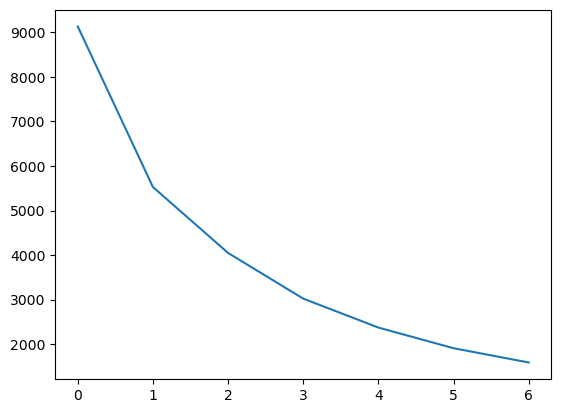

In [21]:
# step-4.2
# Using Elbo method to find the perfect n_cluster
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for i in range_n_clusters:
    kmeans = KMeans(n_clusters= i, max_iter=50)
    kmeans.fit(X_train_transform)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

* From the above plot the elbow curve on '1'
* The the first index position is '3' .so, '3' is best for n_clusters

In [22]:
# step-4.3 [applying the n_cluster]
model=KMeans(n_clusters=3,max_iter=50)
model.fit(X_train_transform)

C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [23]:
# step-4.4
print(model.labels_)
print(model.cluster_centers_)

[1 0 0 ... 0 0 0]
[[-0.01237989  0.05102288 -0.5169079 ]
 [-0.17501105 -0.3450884   1.52697177]
 [ 9.01244546  8.3822344  -0.85479601]]


In [24]:
# step-4.5   [grouping_cluster_id]
group_df['n_cluster_id']=model.labels_
group_df.head()

,CustomerID,amount,frequency,recency,n_cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,7,1,0
2,12348.0,1797.24,4,74,0
3,12349.0,1757.55,1,18,0
4,12350.0,334.40,1,309,1


<AxesSubplot:xlabel='n_cluster_id', ylabel='amount'>

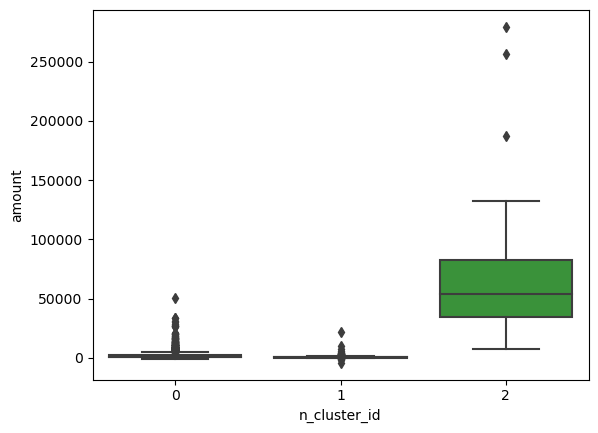

In [25]:
# step-4.6
sns.boxplot(x='n_cluster_id',y='amount',data=group_df)

* Cluster 2 represents high monetary customers.
* Cluster 0 and 1 has high overlap.

<AxesSubplot:xlabel='n_cluster_id', ylabel='frequency'>

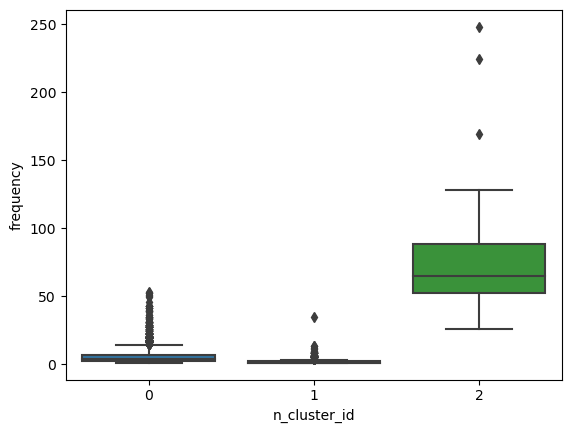

In [26]:
sns.boxplot(x='n_cluster_id',y='frequency',data=group_df)

* Cluster 2 represents high frequency customers.
* Cluster 0 and 1 has high overlap.

<AxesSubplot:xlabel='n_cluster_id', ylabel='recency'>

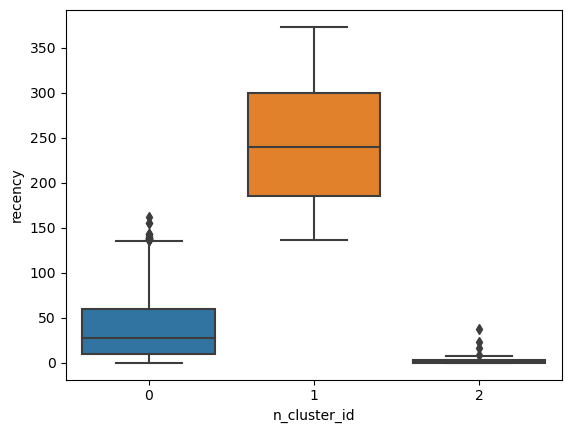

In [27]:
sns.boxplot(x='n_cluster_id',y='recency',data=group_df)

* Cluster 2 represents high recency customers.
* Cluster 0 represents least recent.

<AxesSubplot:>

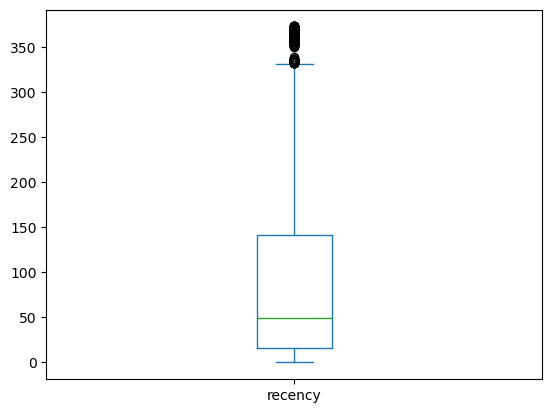

In [28]:
# There are few outliers in recency column
group_df['recency'].plot(kind='box')

<AxesSubplot:>

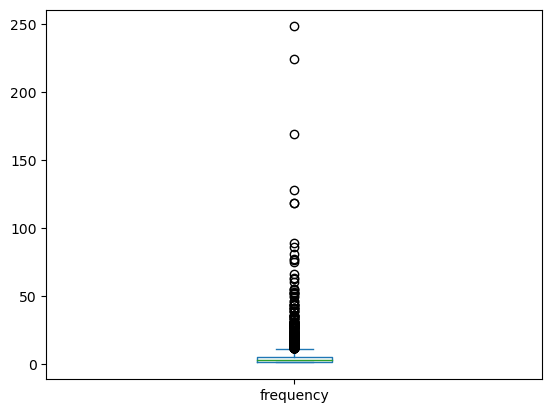

In [29]:
# there are few outliers in frequency column
group_df['frequency'].plot(kind='box')

<AxesSubplot:>

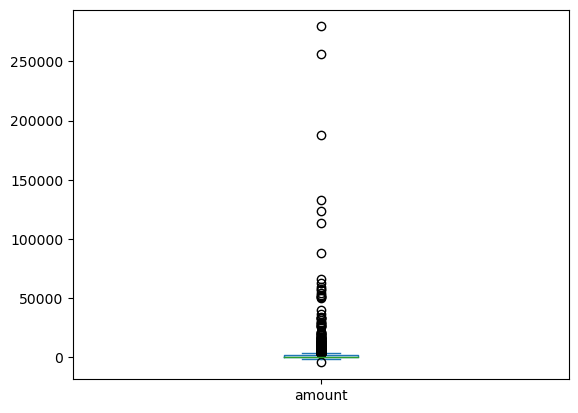

In [30]:
# there are few outliers in amount column
group_df['amount'].plot(kind='box')

In [31]:
def outliers(group_df,col):
    Q1=group_df[col].quantile(0.10)
    Q3=group_df[col].quantile(0.90)
    IQR=Q3-Q1
    Lb=Q1-1.5*IQR
    Ub=Q3+1.5*IQR
    group_df=group_df[(group_df[col]>Lb)&(group_df[col]<Ub)]
    return group_df

In [32]:
group_df=outliers(group_df,'amount')
group_df.shape

(4253, 5)

In [33]:
group_df=outliers(group_df,'frequency')
group_df.shape

(4209, 5)

In [34]:
group_df=outliers(group_df,'recency')
group_df.shape

(4209, 5)

## After removing the outliers

In [38]:
# step-1
rfm_df=group_df[['amount','frequency','recency']]
rfm_df.head()

,amount,frequency,recency
0,0.00,2,325
1,4310.00,7,1
2,1797.24,4,74
3,1757.55,1,18
4,334.40,1,309


In [40]:
# step-2
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
rfm_df_scaled=scaler.fit_transform(rfm_df)
rfm_df_scaled.shape                                  # It is in numpy formate. so,we change it pandas DataFrame

(4209, 3)

In [41]:
# Converting to pandas DataFrame
rfm_df_scaled=pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns=['amount','frequency','recency']
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.844245,-0.498797,2.280654
1,2.423353,0.801164,-0.919107
2,0.518321,0.021187,-0.198173
3,0.488230,-0.758789,-0.751218
4,-0.590722,-0.758789,2.122641


C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

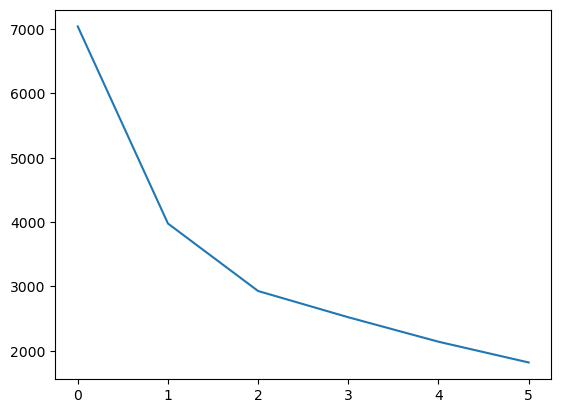

In [42]:
# Applying elbow method to find perfect cluster value
ss=[]
range_n_clusters=[2,3,4,5,6,7]
for i in range_n_clusters:
    kmeans=KMeans(n_clusters=i,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ss.append(kmeans.inertia_)
plt.plot(ss)

In [43]:
# By the above plot we know that 1St index position value is perfect for clustering  [3]
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=50, n_clusters=3)

In [44]:
# finding labels,centers
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[0 2 1 ... 1 2 1]
[[-0.55741405 -0.57964535  1.52900071]
 [-0.24334131 -0.22954548 -0.47229683]
 [ 1.83719938  1.82039714 -0.6708788 ]]


In [45]:
# grouping the lables
group_df['clster_id']=kmeans.labels_
group_df.head()

,CustomerID,amount,frequency,recency,n_cluster_id,clster_id
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,7,1,0,2
2,12348.0,1797.24,4,74,0,1
3,12349.0,1757.55,1,18,0,1
4,12350.0,334.40,1,309,1,0


In [46]:
# Identifing the count of values
group_df.clster_id.value_counts()

1    2499
0    1058
2     652
Name: clster_id, dtype: int64

<AxesSubplot:title={'center':'amount'}, xlabel='clster_id'>

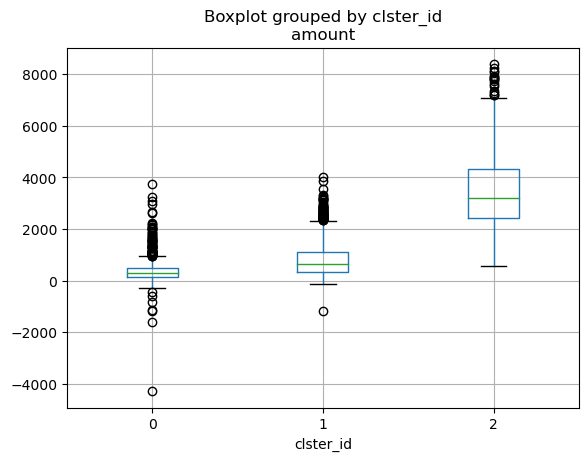

In [51]:
# Boxplot for clster_id and amount
group_df.boxplot(by='clster_id',column='amount')

# &#11088;  OBSERVATIONS:
<div style='background-color: #ADD8E6; padding:10px; color: ;'>
* cluster <span style='background-color: white; padding: 2px;'> 2</span> has high monetary customers.
</div>
<div style='background-color: #ADD8E6; padding:10px; color: ;'>
    * cluster <span style='background-color: white; padding: 2px;'>0</span> has low monetary customers.
    </div>

<AxesSubplot:title={'center':'frequency'}, xlabel='clster_id'>

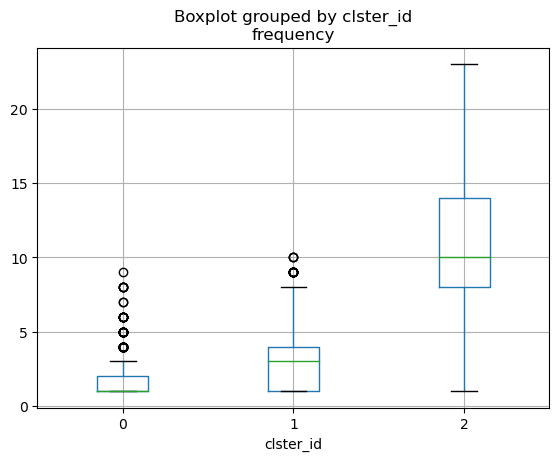

In [52]:
# Boxplot for clster_id and frequency
group_df.boxplot(by='clster_id',column='frequency')

# &#11088;  OBSERVATIONS:
<div style='background-color: #ADD8E6; padding:10px; color: ;'>
* cluster <span style='background-color: white; padding: 2px;'> 2</span> has high frequency.
</div>
<div style='background-color: #ADD8E6; padding:10px; color: ;'>
    * cluster <span style='background-color: white; padding: 2px;'>0</span> shows low frequency
    </div>

<AxesSubplot:title={'center':'recency'}, xlabel='clster_id'>

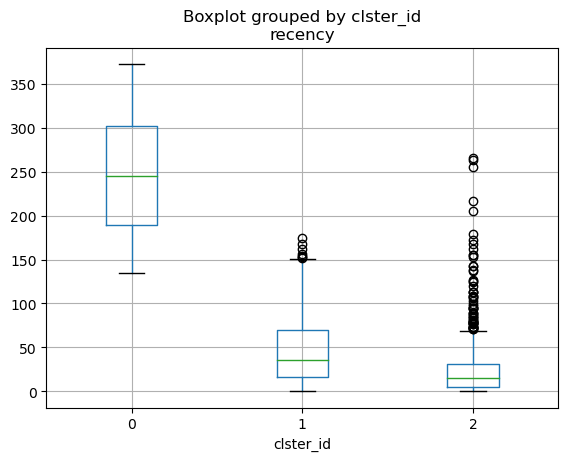

In [53]:
# Boxplot for clster_id and recency
group_df.boxplot(by='clster_id',column='recency')

# &#11088;  OBSERVATIONS:
<div style='background-color: #ADD8E6; padding:10px; color: ;'>
* cluster <span style='background-color: white; padding: 2px;'> 2</span> has high recency.
</div>
<div style='background-color: #ADD8E6; padding:10px; color: ;'>
    * cluster <span style='background-color: white; padding: 2px;'>0</span> shows low recency [may be there are charn]
    </div>